#                                             Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [540]:
##### Import the Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [541]:
##### Load the data sets
Insurance_df = pd.read_csv('Insurance_claim.csv')

In [542]:
Insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


##### EDA Process And Visulization of Data

In [543]:
#### check the statistical information of datasets
Insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [544]:
##### check the Stastical summary
Insurance_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [545]:
##### Check the null Value present in Datasets
Insurance_df.isnull()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [546]:
##### check the sum count of isnull present in data sets
Insurance_df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [547]:
##### In one COlumn all values are null (_c39) it is better to drop the column to fill null value


In [548]:
##### separate the catagorical and Continous value in one variable it will give you the best view and handle of data 
columns = [columns for columns in Insurance_df.columns if Insurance_df[columns].dtypes=='object']
columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

<AxesSubplot:>

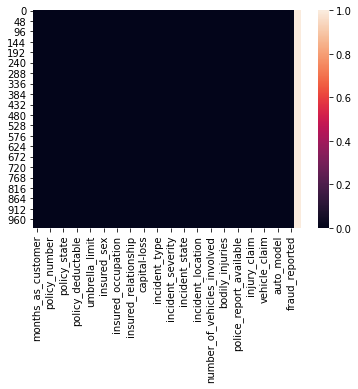

In [549]:
##### visualization of data
sns.heatmap(Insurance_df.isnull())

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

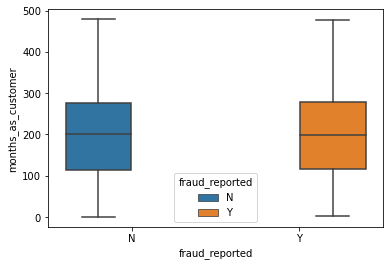

In [550]:
##### check months_as_customer with fraud 
sns.boxplot(x='fraud_reported',y='months_as_customer',hue="fraud_reported",data=Insurance_df.sort_values('months_as_customer',ascending=False))

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

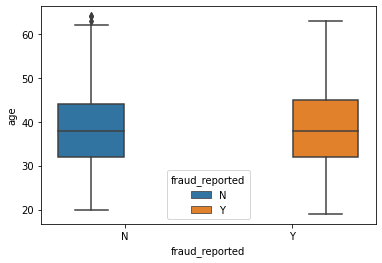

In [551]:
sns.boxplot(x='fraud_reported',y='age',hue="fraud_reported",data=Insurance_df.sort_values('age',ascending=False))

<AxesSubplot:xlabel='policy_deductable', ylabel='age'>

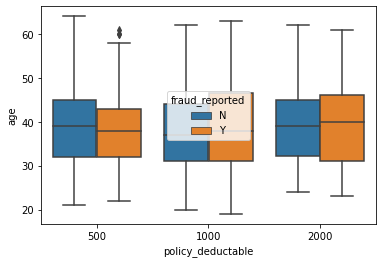

In [552]:
sns.boxplot(x='policy_deductable',y='age',hue="fraud_reported",data=Insurance_df.sort_values('policy_deductable',ascending=False))

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

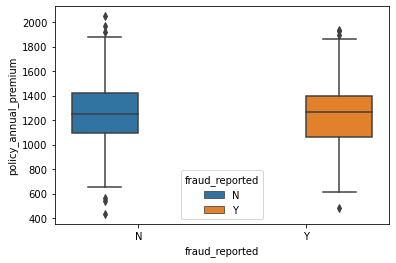

In [553]:
sns.boxplot(x='fraud_reported',y='policy_annual_premium',hue="fraud_reported",data=Insurance_df.sort_values('policy_annual_premium',ascending=False))

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

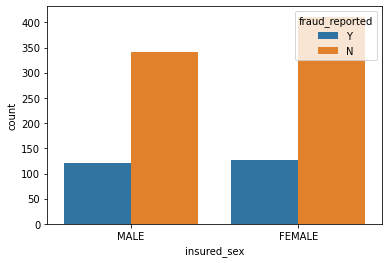

In [554]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=Insurance_df)

In [555]:
##### Female report more fraudulent claim in insurance

<AxesSubplot:xlabel='policy_state', ylabel='count'>

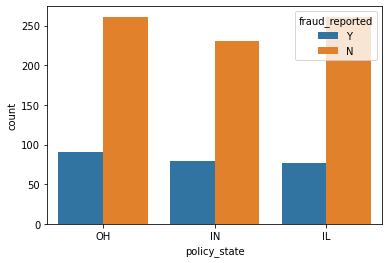

In [556]:
sns.countplot(x='policy_state',hue='fraud_reported',data=Insurance_df)

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

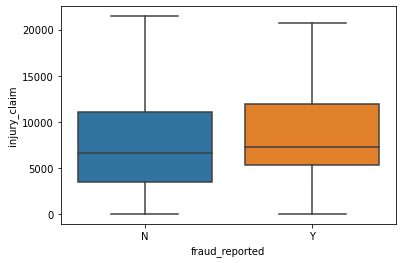

In [557]:
sns.boxplot(x='fraud_reported',y='injury_claim',data=df.sort_values('injury_claim',ascending=False))

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

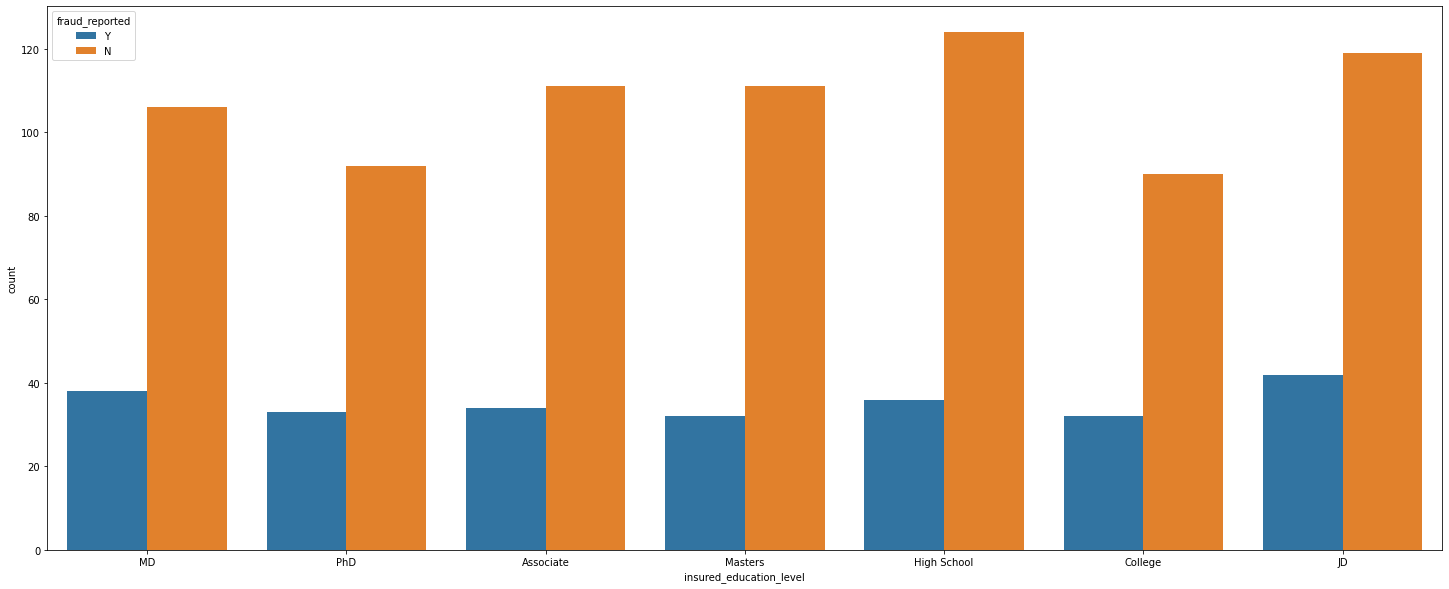

In [558]:
plt.figure(figsize=(25,10))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=Insurance_df)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

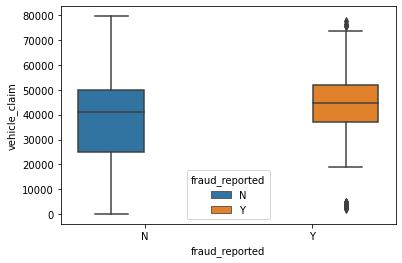

In [559]:
sns.boxplot(x='fraud_reported',y='vehicle_claim',hue='fraud_reported',data=Insurance_df.sort_values('vehicle_claim',ascending=False))

<AxesSubplot:xlabel='fraud_reported', ylabel='auto_year'>

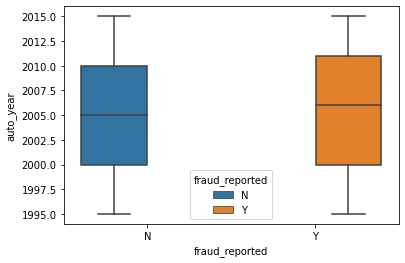

In [560]:
sns.boxplot(x='fraud_reported',y='auto_year',hue='fraud_reported',data=Insurance_df.sort_values('auto_year',ascending=False))

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

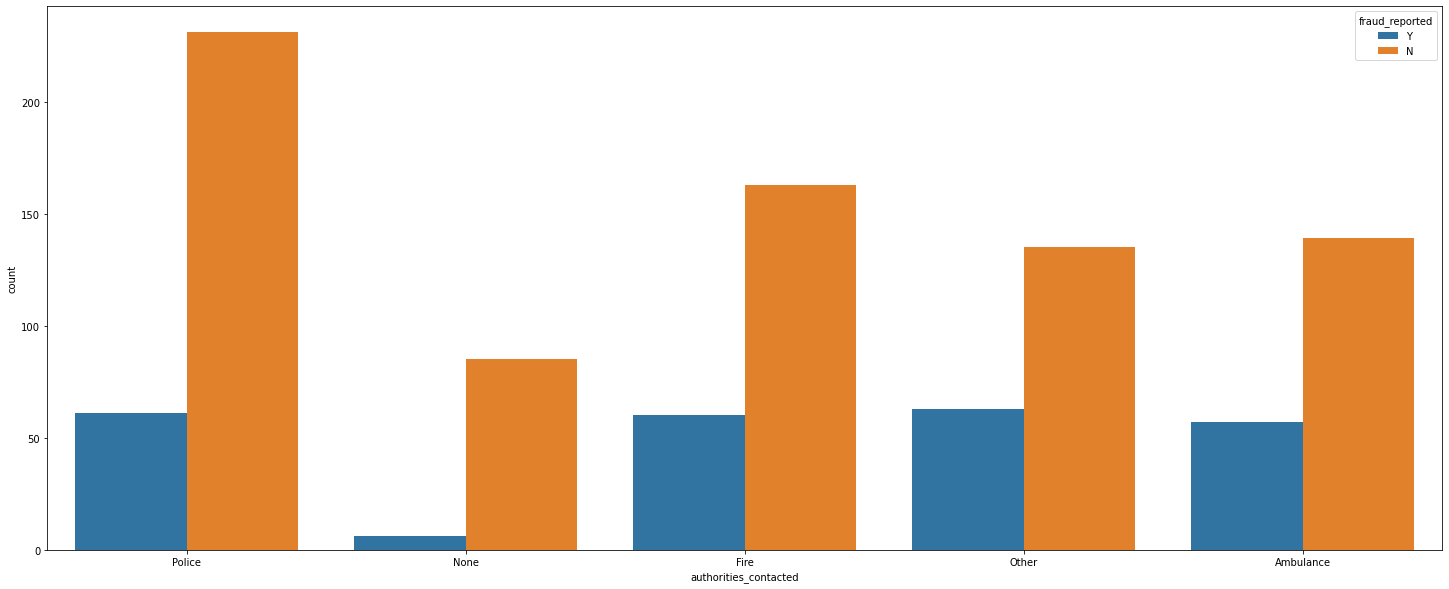

In [561]:
plt.figure(figsize=(25,10))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=Insurance_df)

In [562]:
###### Above Graph Shows thw count of columns with fraud report with yes and No

<AxesSubplot:xlabel='policy_annual_premium', ylabel='total_claim_amount'>

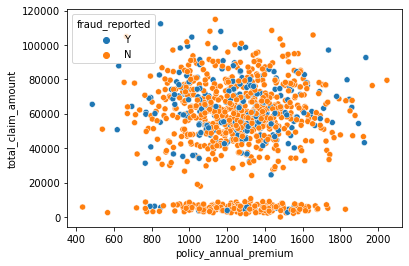

In [563]:
##### lets Try with more graph
sns.scatterplot(x='policy_annual_premium',y='total_claim_amount',hue='fraud_reported',data=Insurance_df)

<AxesSubplot:>

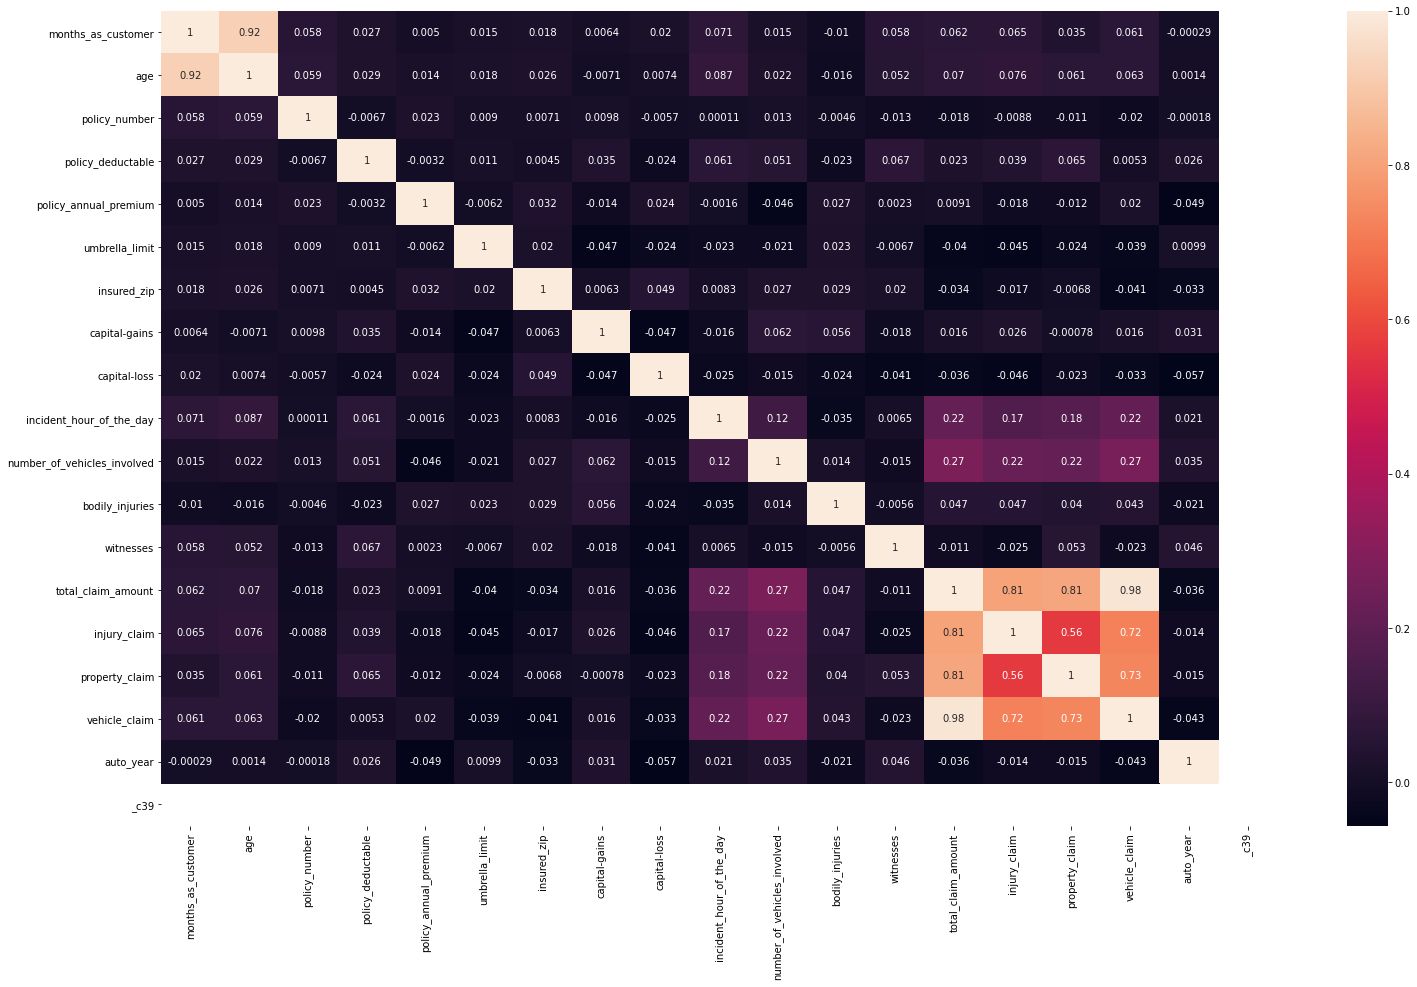

In [564]:
#### cor relation
plt.figure(figsize=(25,15))
sns.heatmap(Insurance_df.corr(),annot=True,data=Insurance_df)

In [565]:
#### Orange Portion seems to bee good realtion 

##### Data Cleaning and Preprocessing


In [566]:
##### drop the columns having all value NaN
Insurance_df.drop(['_c39'],axis=1,inplace=True)

In [567]:
Insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [568]:
##### convert date into datetime for better prediction 
### lets Create one function
def change_into_date(col):
    Insurance_df[col] = pd.to_datetime(Insurance_df[col])

In [569]:
change_into_date('policy_bind_date')


In [570]:
change_into_date('incident_date')

In [571]:
Insurance_df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [572]:
#### Extract Date , Month and Year From Datasets
Insurance_df['policy_bind_day'] = Insurance_df['policy_bind_date'].dt.day
Insurance_df['policy_bind_month'] = Insurance_df['policy_bind_date'].dt.month
Insurance_df['policy_bind_year'] = Insurance_df['policy_bind_date'].dt.year

In [573]:
Insurance_df.drop(['policy_bind_date'],axis=1,inplace=True)

In [574]:
Insurance_df['incident_day'] = Insurance_df['incident_date'].dt.day
Insurance_df['incident_month'] = Insurance_df['incident_date'].dt.month
Insurance_df['incident_year'] = Insurance_df['incident_date'].dt.year

In [575]:
Insurance_df.drop(['incident_date'],axis=1,inplace=True)

In [576]:
#### drop some unnecessary cotagorical columsn
Insurance_df.drop(['incident_location','auto_model'],axis=1,inplace=True)

In [577]:
##### Onle one value means unique columns just drop it is not necessary
Insurance_df.drop(['incident_year','policy_number','insured_zip'],axis=1,inplace=True)

In [578]:
Insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [579]:
##### replace ? mark with NaN
Insurance_Insurance_df = Insurance_df.replace('?',np.NaN)

In [580]:
Insurance_df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      

In [581]:
Insurance_df['property_damage']

0      YES
1      NaN
2       NO
3      NaN
4       NO
      ... 
995    YES
996    YES
997    NaN
998    NaN
999    NaN
Name: property_damage, Length: 1000, dtype: object

In [582]:
Insurance_df['police_report_available']

0      YES
1      NaN
2       NO
3       NO
4       NO
      ... 
995    NaN
996    NaN
997    YES
998    YES
999    NaN
Name: police_report_available, Length: 1000, dtype: object

In [583]:
Insurance_df['collision_type']

0       Side Collision
1                  NaN
2       Rear Collision
3      Front Collision
4                  NaN
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                NaN
Name: collision_type, Length: 1000, dtype: object

In [584]:
##### in Catagorical apply mode method to fill NaN
Mode1=Insurance_df['collision_type'].mode()

In [585]:
Insurance_df['collision_type'].fillna(Insurance_df['collision_type'].mode()[0],inplace=True)

In [586]:
#### some cases might me no records for policy_report and Property_damage
Insurance_df['police_report_available'].fillna('NO',inplace=True)
Insurance_df['property_damage'].fillna('NO',inplace=True)

In [587]:
Insurance_df.isnull().any().any()

False

In [588]:
#### Now No Null Value is Presesnt

In [589]:
#### check for catagorical columns
columns = [columns for columns in Insurance_df.columns if Insurance_df[columns].dtypes=='object']
columns

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'fraud_reported']

In [590]:
Insurance_df_cat = Insurance_df[columns]

In [591]:
Insurance_df_cat 

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,NO,Honda,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,NO,Volkswagen,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,NO,YES,Suburu,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,NO,YES,Audi,N


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

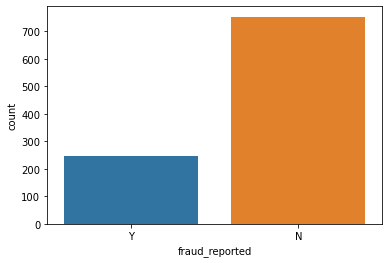

In [592]:
##### let check for the balance of class
sns.countplot(Insurance_df['fraud_reported'])

In [593]:
##### class Imbalance problem seems to with target variable
Insurance_df['fraud_reported'].value_counts()


N    753
Y    247
Name: fraud_reported, dtype: int64

In [594]:
##### separate X and Y to balance the class
x= Insurance_df.drop(['fraud_reported'],axis=1)
y= Insurance_df['fraud_reported']

In [595]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros=RandomOverSampler(random_state=42)
x_over,y_over=ros.fit_resample(x,y)
print('Print Original Dataset',Counter(y))
print('Print Original Dataset',Counter(y_over))

Print Original Dataset Counter({'N': 753, 'Y': 247})
Print Original Dataset Counter({'Y': 753, 'N': 753})


In [596]:
#### class has been balanced with oversampling of model

In [597]:
#### check for continous columns
cont = [cont for cont in df.columns if df[cont].dtypes!='object']

In [598]:
count_col = Insurance_df[cont]

In [599]:
count_col

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,71610,6510,13020,52080,2004,17,10,2014,25,1
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,5070,780,780,3510,2007,27,6,2006,21,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,34650,7700,3850,23100,2007,9,6,2000,22,2
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,63400,6340,6340,50720,2014,25,5,1990,1,10
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,6500,1300,650,4550,2009,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,87200,17440,8720,61040,2006,16,7,1991,22,2
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,108480,18080,18080,72320,2015,1,5,2014,24,1
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,67500,7500,7500,52500,1996,17,2,2003,23,1
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,46980,5220,5220,36540,1998,18,11,2011,26,2


In [600]:
##### for Continous Columns Check for Outliers
count_col.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year',
       'incident_day', 'incident_month'],
      dtype='object')

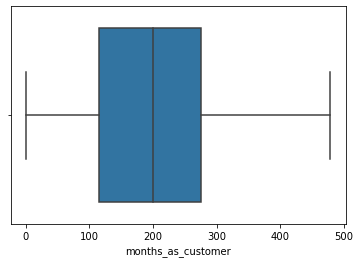

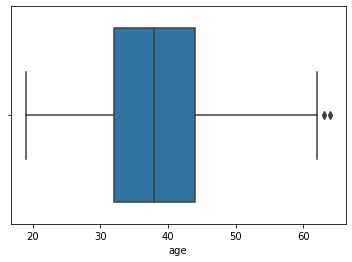

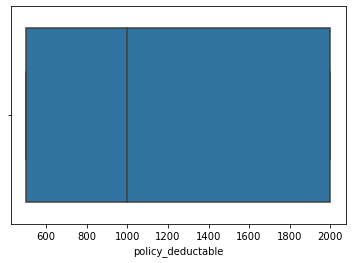

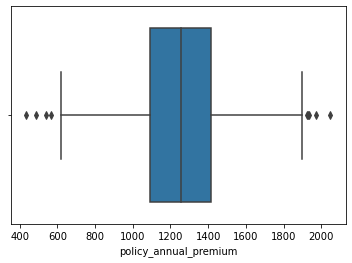

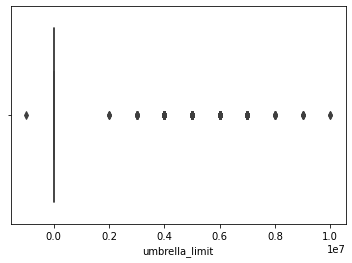

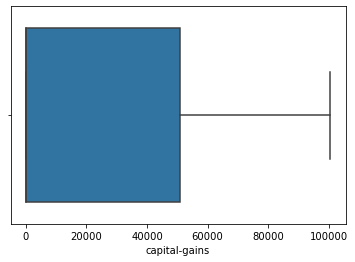

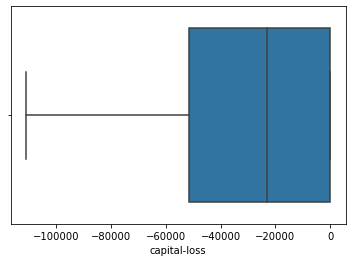

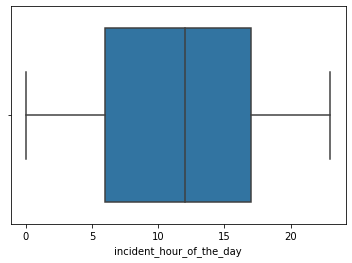

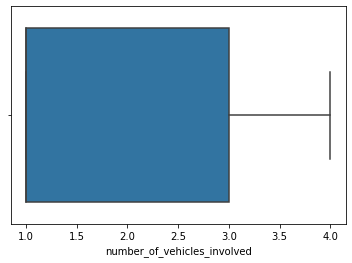

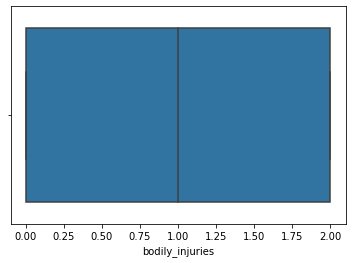

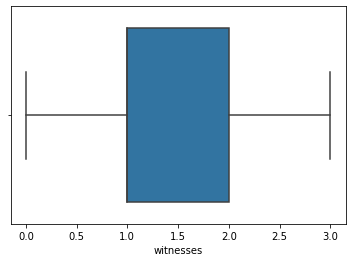

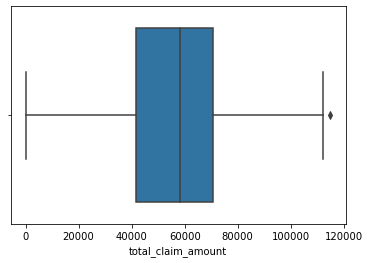

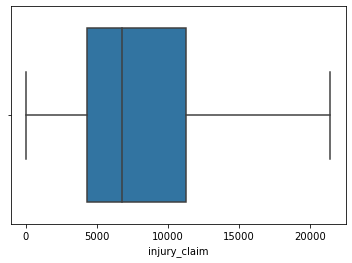

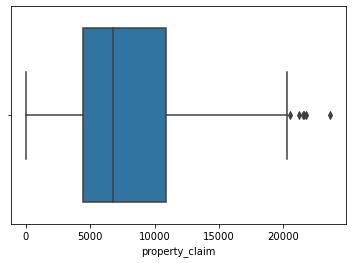

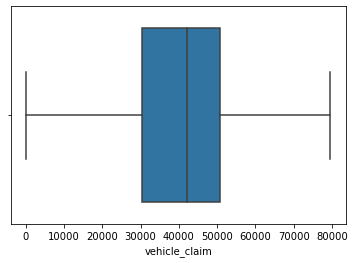

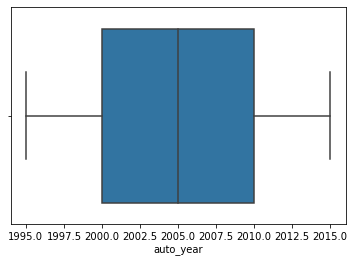

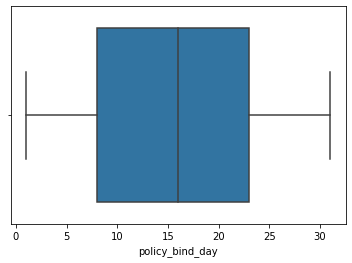

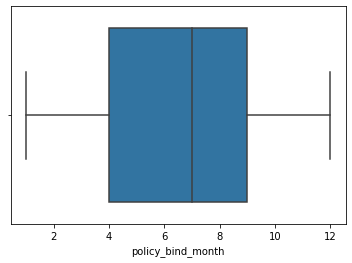

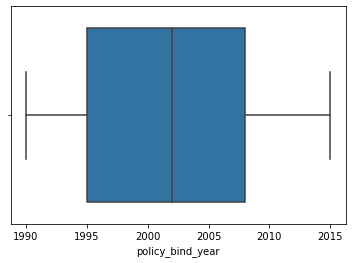

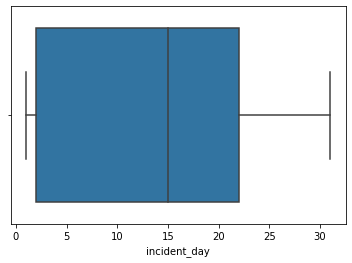

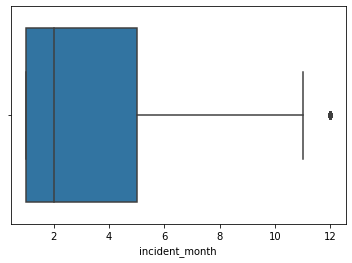

In [601]:
for i in count_col.columns:
    sns.boxplot(count_col[i])
    plt.show()

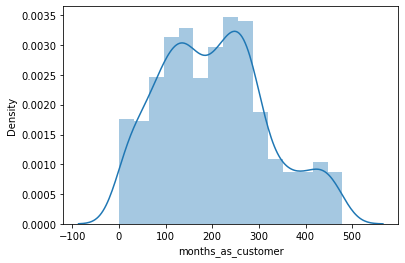

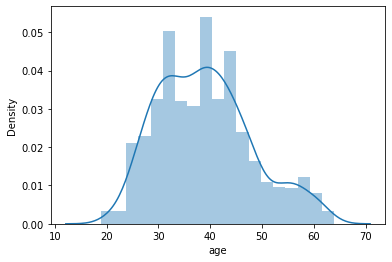

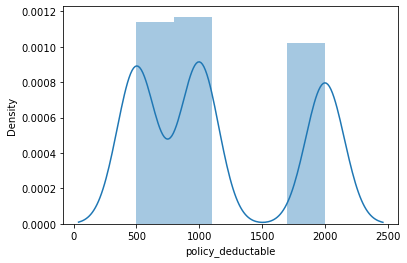

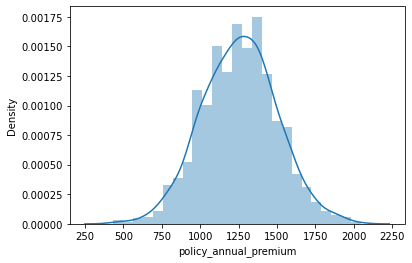

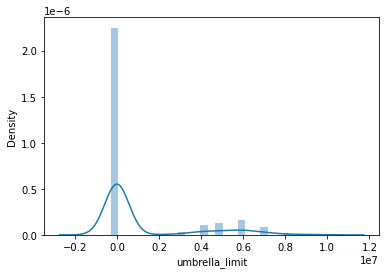

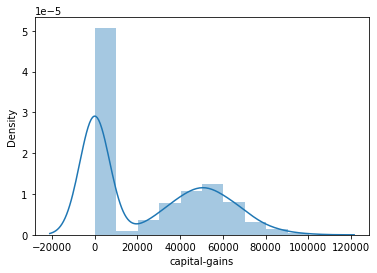

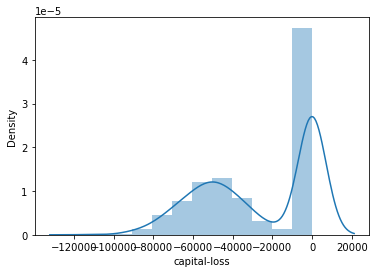

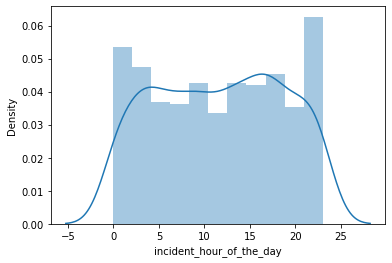

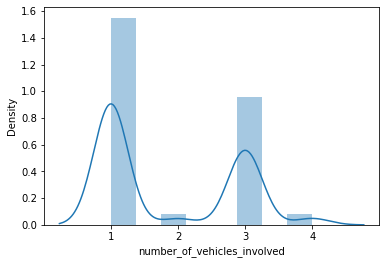

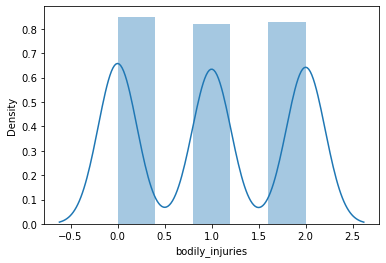

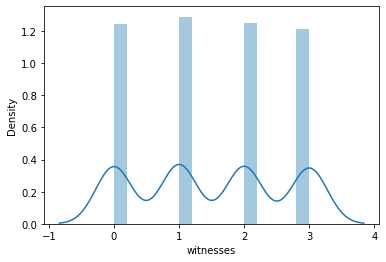

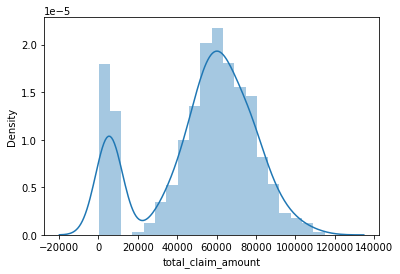

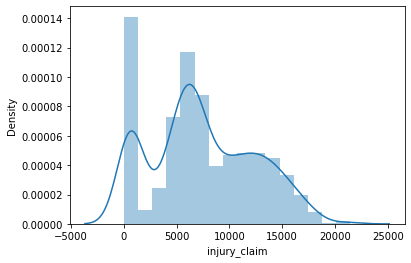

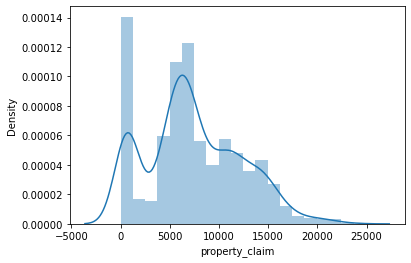

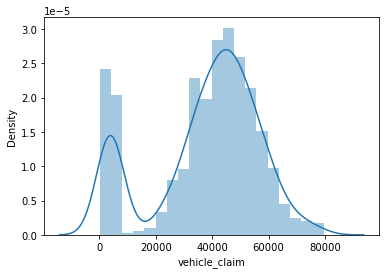

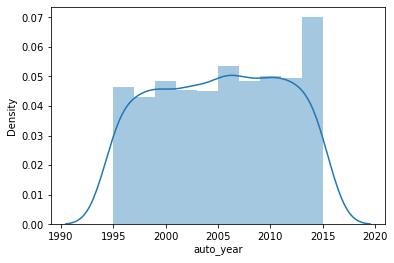

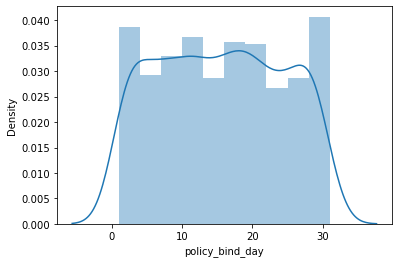

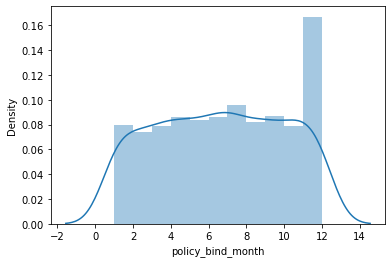

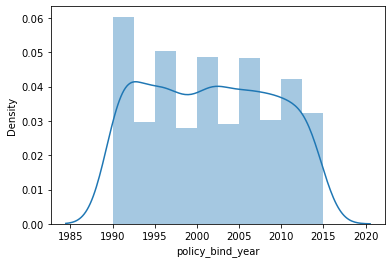

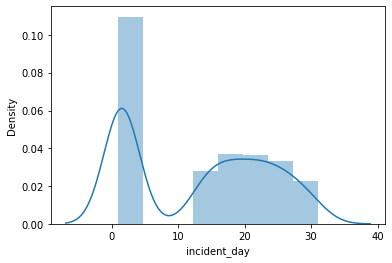

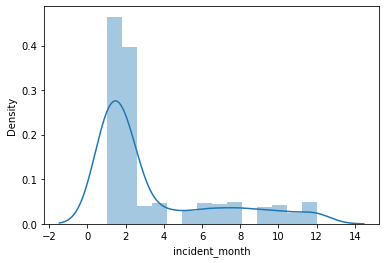

In [602]:
#### see the skewness
for i in count_col.columns:
    sns.distplot(count_col[i])
    plt.show()

In [603]:
count_col.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_bind_day                0.024372
policy_bind_month             -0.029321
policy_bind_year               0.052511
incident_day                   0.059111
incident_month                 1.375894
dtype: float64

In [604]:
#### lets find median 
median = np.median(Insurance_df['policy_annual_premium'])

In [605]:
median

1257.1999999999998

In [606]:
count_col['policy_annual_premium']=np.where(count_col['policy_annual_premium']>=1900,median,count_col['policy_annual_premium'])

In [607]:
count_col.shape

(1000, 21)

In [608]:
count_col['policy_annual_premium']=np.where(count_col['policy_annual_premium']<=600,median,count_col['policy_annual_premium'])

In [609]:
median = np.median(count_col['property_claim'])

In [610]:
median

6750.0

In [611]:
count_col['property_claim']=np.where(count_col['property_claim']>=20000,median,count_col['property_claim'])

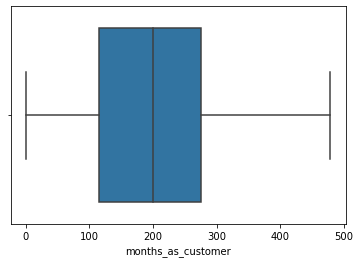

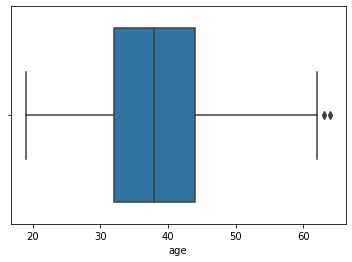

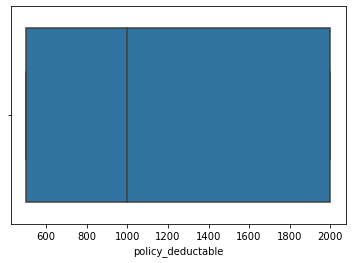

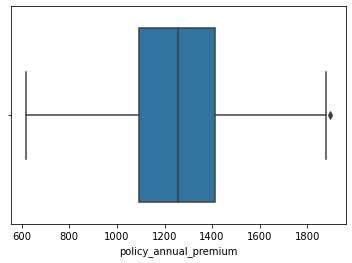

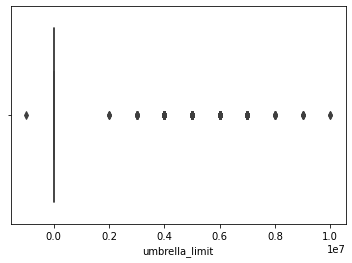

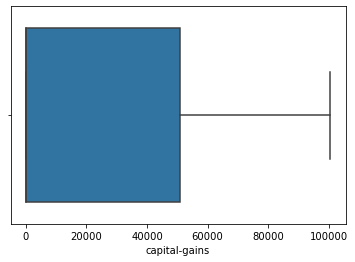

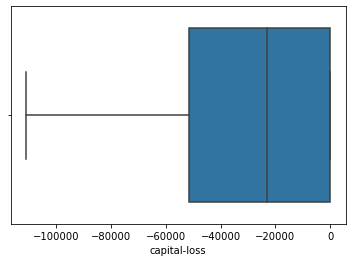

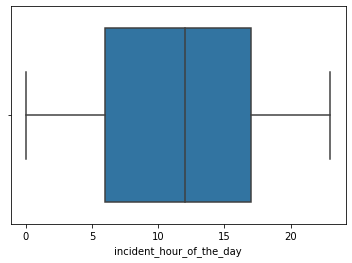

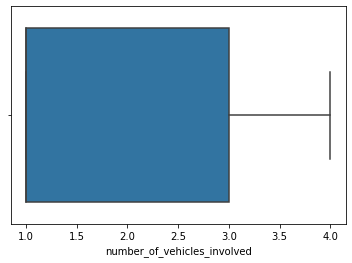

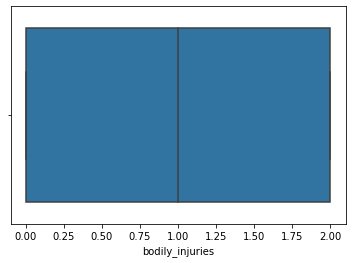

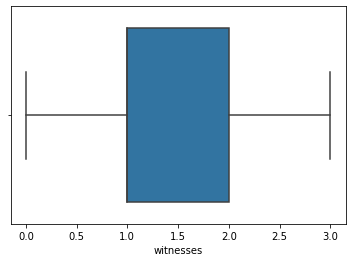

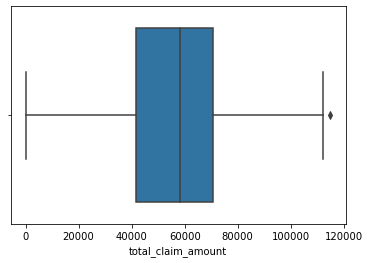

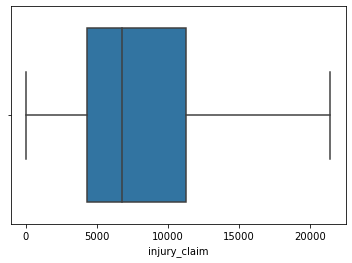

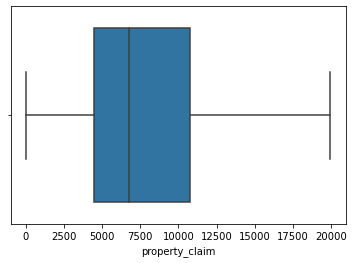

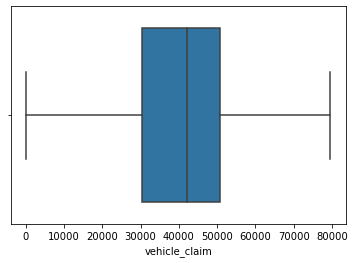

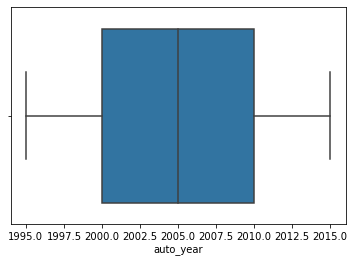

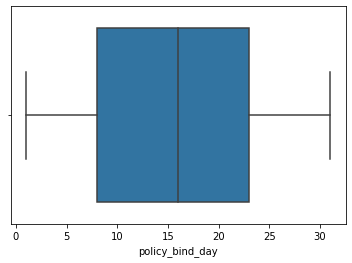

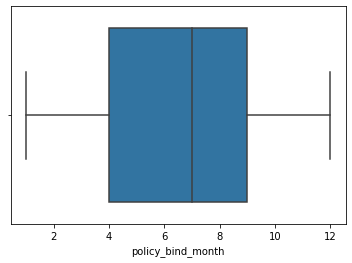

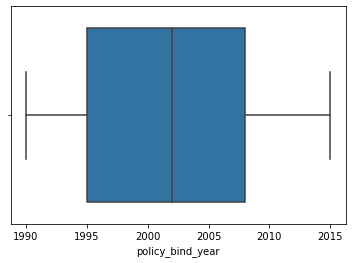

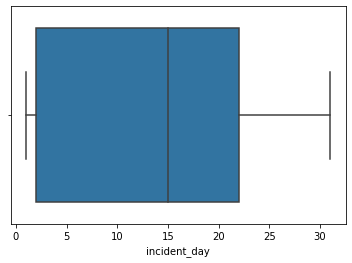

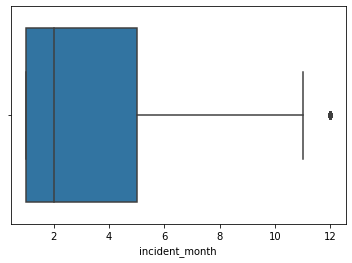

In [612]:
for i in count_col.columns:
    sns.boxplot(count_col[i])
    plt.show()

In [613]:
##### ALmost Outliers has been Removed from datasets

In [614]:
count_col.shape

(1000, 21)

In [615]:
count_col['policy_deductable'] = np.log(count_col['policy_deductable'])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

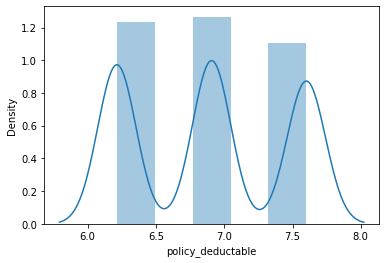

In [616]:
sns.distplot(count_col['policy_deductable'])

In [617]:
Insurance_df_cat

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,NO,NO,Mercedes,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,NO,NO,Chevrolet,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,NO,NO,Accura,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,YES,NO,Honda,N
996,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,YES,NO,Volkswagen,N
997,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,NO,YES,Suburu,N
998,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,NO,YES,Audi,N


In [618]:
##### use label Encode for catagorical columns
from sklearn.preprocessing import LabelEncoder

In [619]:
le = LabelEncoder()

In [620]:
for i in df_cat.columns:
    Insurance_df_cat[i] = le.fit_transform(Insurance_df_cat[i])

In [621]:
Insurance_df_cat

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,fraud_reported
0,2,1,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1
1,1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,1
2,2,0,0,6,11,2,3,0,1,1,4,1,1,0,0,4,0
3,0,1,0,6,1,2,4,2,0,0,4,2,0,0,0,3,1
4,0,2,1,0,11,2,4,3,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,2,0,5,2,13,4,2,0,1,1,0,4,1,0,6,0
996,0,0,0,6,9,17,5,2,1,0,1,4,3,1,0,13,0
997,2,1,0,5,1,3,2,0,2,1,4,0,0,0,1,11,0
998,0,2,1,0,5,0,5,2,1,0,3,1,0,0,1,1,0


In [657]:
from sklearn.preprocessing import StandardScaler

In [658]:
sc = StandardScaler()

In [659]:
count_col.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year',
       'incident_day', 'incident_month'],
      dtype='object')

In [660]:
scaled = sc.fit_transform(count_col)

In [661]:
count_col = pd.DataFrame(scaled,columns=['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year',
       'incident_day', 'incident_month'])

In [662]:
final_df = pd.concat([count_col,df_cat],axis=1)
final_df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,fraud_reported
0,1.078140,0.990836,0.043487,0.645098,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,...,2,2,0,4,4,1,1,1,10,1
1,0.208995,0.334073,1.285962,-0.250644,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,...,3,1,1,4,5,5,0,0,8,1
2,-0.608002,-1.088913,1.285962,0.671711,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,...,0,1,1,4,1,1,0,0,4,0
3,0.452355,0.224613,1.285962,0.682817,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,...,2,0,0,4,2,0,0,0,3,1
4,0.208995,0.552994,0.043487,1.401197,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,...,3,1,1,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,0.043487,0.234541,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,...,2,0,1,1,0,4,1,0,6,0
996,0.704407,0.224613,0.043487,0.772738,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,...,2,1,0,1,4,3,1,0,13,0
997,-0.642767,-0.541611,-1.198989,0.545054,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,...,0,2,1,4,0,0,0,1,11,0
998,2.208028,2.523284,1.285962,0.431553,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,...,2,1,0,3,1,0,0,1,1,0


In [ ]:
#### Modeling
# let's split the data into dependent and independent sets

In [663]:
x = final_df.drop(['fraud_reported'],axis=1)
y = final_df['fraud_reported']

In [664]:
print('Shape of x :',x.shape)
print('Shape of y :',y.shape)

Shape of x : (1000, 37)
Shape of y : (1000,)


In [665]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [666]:
##### lets find the best Random State
maxAcc =0
maxRs =0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    classifier = LogisticRegression()
    classifier.fit(x_train,y_train)
    pred = classifier.predict(x_test)
    accu = accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc = accu
        maxRs = i
print('Best Accuracy =',maxAcc,'Best Random State =',maxRs)

Best Accuracy = 0.84 Best Random State = 162


In [667]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=164)

In [668]:
def predict(ml_model):
    print('Model is : {}'.format(ml_model))
    model = ml_model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    Training_Acuracy = model.score(x_train,y_train)
    Testing_Accuracy = model.score(x_test,y_test)
    
    Accuracy_score = accuracy_score(y_test,prediction)
    classification_score = classification_report(y_test,prediction)
   
    cv_score = cross_val_score(model,x,y,cv=5).mean()
    
    print('Training Accuracy ',Training_Acuracy)
    print('Testing Accuracy ',Testing_Accuracy)
    print('Accuracy Score :', accu)
    print('Classification Score :', classification_score)
    print('confusion Matrix :', confusion_matrix(y_test, prediction))
    print('Cv_score :',cv_score)

In [670]:
predict(LogisticRegression())

Model is : LogisticRegression()
Training Accuracy  0.8075
Testing Accuracy  0.8
Accuracy Score : 0.78
Classification Score :               precision    recall  f1-score   support

           0       0.84      0.92      0.88       155
           1       0.59      0.38      0.46        45

    accuracy                           0.80       200
   macro avg       0.71      0.65      0.67       200
weighted avg       0.78      0.80      0.78       200

confusion Matrix : [[143  12]
 [ 28  17]]
Cv_score : 0.774


In [651]:
predict(RandomForestClassifier())

Model is : RandomForestClassifier()
Training Accuracy  1.0
Testing Accuracy  0.77
Accuracy Score : 0.755
Classification Score :               precision    recall  f1-score   support

           0       0.85      0.88      0.86       166
           1       0.29      0.24      0.26        34

    accuracy                           0.77       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.75      0.77      0.76       200

confusion Matrix : [[146  20]
 [ 26   8]]
Cv_score : 0.7590000000000001


In [671]:
predict(ExtraTreesClassifier())

Model is : ExtraTreesClassifier()
Training Accuracy  1.0
Testing Accuracy  0.785
Accuracy Score : 0.78
Classification Score :               precision    recall  f1-score   support

           0       0.80      0.95      0.87       155
           1       0.56      0.20      0.30        45

    accuracy                           0.79       200
   macro avg       0.68      0.58      0.58       200
weighted avg       0.75      0.79      0.74       200

confusion Matrix : [[148   7]
 [ 36   9]]
Cv_score : 0.765


In [653]:
predict(AdaBoostClassifier())

Model is : AdaBoostClassifier()
Training Accuracy  0.88875
Testing Accuracy  0.785
Accuracy Score : 0.755
Classification Score :               precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.38      0.44      0.41        34

    accuracy                           0.79       200
   macro avg       0.63      0.65      0.64       200
weighted avg       0.80      0.79      0.79       200

confusion Matrix : [[142  24]
 [ 19  15]]
Cv_score : 0.7979999999999999


In [673]:
predict(SVC(kernel='poly'))

Model is : SVC(kernel='poly')
Training Accuracy  0.77375
Testing Accuracy  0.77
Accuracy Score : 0.78
Classification Score :               precision    recall  f1-score   support

           0       0.78      0.98      0.87       155
           1       0.40      0.04      0.08        45

    accuracy                           0.77       200
   macro avg       0.59      0.51      0.47       200
weighted avg       0.69      0.77      0.69       200

confusion Matrix : [[152   3]
 [ 43   2]]
Cv_score : 0.748


In [672]:
predict(SVC(kernel='rbf'))

Model is : SVC()
Training Accuracy  0.7475
Testing Accuracy  0.775
Accuracy Score : 0.78
Classification Score :               precision    recall  f1-score   support

           0       0.78      1.00      0.87       155
           1       0.00      0.00      0.00        45

    accuracy                           0.78       200
   macro avg       0.39      0.50      0.44       200
weighted avg       0.60      0.78      0.68       200

confusion Matrix : [[155   0]
 [ 45   0]]
Cv_score : 0.7529999999999999


In [674]:
predict(SVC(kernel='sigmoid'))

Model is : SVC(kernel='sigmoid')
Training Accuracy  0.68625
Testing Accuracy  0.71
Accuracy Score : 0.78
Classification Score :               precision    recall  f1-score   support

           0       0.79      0.85      0.82       155
           1       0.30      0.22      0.26        45

    accuracy                           0.71       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.68      0.71      0.69       200

confusion Matrix : [[132  23]
 [ 35  10]]
Cv_score : 0.724


In [675]:
##### lets Hyper Tune the Model
from sklearn.model_selection import GridSearchCV

In [677]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [678]:

GCV=GridSearchCV(LogisticRegression(),param_grid,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [679]:
GCV.best_params_

{'C': 3.727593720314938}

In [681]:
Final_model=LogisticRegression(C=3.727593720314938)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

79.5


In [ ]:
##### Accuracy Has Been Increased 